In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# for PCA transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Remove nrows when ready for full dataset

# Remove 2K from name in last block for complete file

In [3]:
# WARNING, FILE "mergefiles.csv" IS 1.37 GB

delay_data = pd.read_csv("../Resources/mergefiles.csv", encoding = 'utf-8')
delay = pd.DataFrame(delay_data)

# 1. Data Exploration

In [4]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [5]:
count = sum(delay['DEPARTING_AIRPORT'] == 'Houston Intercontinental')
count

177108

In [6]:
delay = delay.drop(delay[(delay.DEPARTING_AIRPORT != 'Houston Intercontinental') |
                         (delay.DEPARTING_AIRPORT != 'Houston Intercontinental')])
delay.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
36579,1,5,0,0700-0759,3,1,38,158,Delta Air Lines Inc.,14501,...,23,Houston Intercontinental,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
36580,1,5,0,0600-0659,3,1,8,132,Delta Air Lines Inc.,14501,...,17,Houston Intercontinental,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
36581,1,5,0,1200-1259,3,1,50,129,Atlantic Southeast Airlines,14501,...,11,Houston Intercontinental,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
36582,1,5,1,1100-1159,2,1,24,129,Atlantic Southeast Airlines,14501,...,11,Houston Intercontinental,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
36583,1,5,0,0600-0659,6,1,8,69,"Midwest Airline, Inc.",14501,...,15,Houston Intercontinental,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7


## Drop Houston Intercontinental and reset Index

In [7]:
delay.drop('DEPARTING_AIRPORT', axis = 1, inplace = True)
delay.reset_index(inplace = True)
delay.head()

,index,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,36579,1,5,0,0700-0759,3,1,38,158,Delta Air Lines Inc.,...,0.000149,23,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
1,36580,1,5,0,0600-0659,3,1,8,132,Delta Air Lines Inc.,...,0.000149,17,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
2,36581,1,5,0,1200-1259,3,1,50,129,Atlantic Southeast Airlines,...,0.000200,11,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
3,36582,1,5,1,1100-1159,2,1,24,129,Atlantic Southeast Airlines,...,0.000200,11,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
4,36583,1,5,0,0600-0659,6,1,8,69,"Midwest Airline, Inc.",...,0.000124,15,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7


In [8]:
delay.drop_duplicates()
delay.head()

,index,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,36579,1,5,0,0700-0759,3,1,38,158,Delta Air Lines Inc.,...,0.000149,23,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
1,36580,1,5,0,0600-0659,3,1,8,132,Delta Air Lines Inc.,...,0.000149,17,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
2,36581,1,5,0,1200-1259,3,1,50,129,Atlantic Southeast Airlines,...,0.000200,11,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
3,36582,1,5,1,1100-1159,2,1,24,129,Atlantic Southeast Airlines,...,0.000200,11,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7
4,36583,1,5,0,0600-0659,6,1,8,69,"Midwest Airline, Inc.",...,0.000124,15,29.983,-95.34,NONE,0.0,0.0,0.0,83.0,4.7


In [9]:
# Missing data
delay.isna().sum()

index                            0
MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [10]:
# Number of unique values, and range
for col in delay.columns:
    print(f'"{col}" has {delay[col].nunique()} unique values, from {delay[col].min()} to {delay[col].max()}')

"index" has 177108 unique values, from 36579 to 6421327
"MONTH" has 12 unique values, from 1 to 12
"DAY_OF_WEEK" has 7 unique values, from 1 to 7
"DEP_DEL15" has 2 unique values, from 0 to 1
"DEP_TIME_BLK" has 19 unique values, from 0001-0559 to 2300-2359
"DISTANCE_GROUP" has 10 unique values, from 1 to 11
"SEGMENT_NUMBER" has 10 unique values, from 1 to 10
"CONCURRENT_FLIGHTS" has 66 unique values, from 1 to 66
"NUMBER_OF_SEATS" has 53 unique values, from 50 to 337
"CARRIER_NAME" has 14 unique values, from Alaska Airlines Inc. to United Air Lines Inc.
"AIRPORT_FLIGHTS_MONTH" has 12 unique values, from 13272 to 15597
"AIRLINE_FLIGHTS_MONTH" has 152 unique values, from 8643 to 91062
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 139 unique values, from 9 to 5398
"AVG_MONTHLY_PASS_AIRPORT" has 1 unique values, from 1690031 to 1690031
"AVG_MONTHLY_PASS_AIRLINE" has 14 unique values, from 473794 to 12460183
"FLT_ATTENDANTS_PER_PASS" has 11 unique values, from 0.0 to 0.000348407665605
"GROUND_SERV_PER

## LATITUDE and LONGITUDE are the same. SNOW and SNWD are zero, will be removed

In [11]:
delay.drop(['LATITUDE', 'LONGITUDE', 'SNOW', 'SNWD', 'index'], axis = 1, inplace = True)
delay.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PREVIOUS_AIRPORT,PRCP,TMAX,AWND
0,1,5,0,0700-0759,3,1,38,158,Delta Air Lines Inc.,14501,...,229,1690031,12460183,0.000144,0.000149,23,NONE,0.0,83.0,4.7
1,1,5,0,0600-0659,3,1,8,132,Delta Air Lines Inc.,14501,...,229,1690031,12460183,0.000144,0.000149,17,NONE,0.0,83.0,4.7
2,1,5,0,1200-1259,3,1,50,129,Atlantic Southeast Airlines,14501,...,3347,1690031,473794,0.000000,0.000200,11,NONE,0.0,83.0,4.7
3,1,5,1,1100-1159,2,1,24,129,Atlantic Southeast Airlines,14501,...,3347,1690031,473794,0.000000,0.000200,11,NONE,0.0,83.0,4.7
4,1,5,0,0600-0659,6,1,8,69,"Midwest Airline, Inc.",14501,...,1055,1690031,1529740,0.000001,0.000124,15,NONE,0.0,83.0,4.7


In [12]:
# Number of flights not delayed (0), and delayed (1)
delay['DEP_DEL15'].value_counts()

0    143115
1     33993
Name: DEP_DEL15, dtype: int64

In [13]:
# Replace " " with "_"
#delay = delay.replace(" ", "_", regex = True)
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace(" ", "_")
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace("/", "_")
delay['DEP_TIME_BLK'] = delay['DEP_TIME_BLK'].str.replace("-", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(" ", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace("/", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(".", "")
delay.head(5)

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PREVIOUS_AIRPORT,PRCP,TMAX,AWND
0,1,5,0,0700_0759,3,1,38,158,Delta_Air_Lines_Inc,14501,...,229,1690031,12460183,0.000144,0.000149,23,NONE,0.0,83.0,4.7
1,1,5,0,0600_0659,3,1,8,132,Delta_Air_Lines_Inc,14501,...,229,1690031,12460183,0.000144,0.000149,17,NONE,0.0,83.0,4.7
2,1,5,0,1200_1259,3,1,50,129,Atlantic_Southeast_Airlines,14501,...,3347,1690031,473794,0.000000,0.000200,11,NONE,0.0,83.0,4.7
3,1,5,1,1100_1159,2,1,24,129,Atlantic_Southeast_Airlines,14501,...,3347,1690031,473794,0.000000,0.000200,11,NONE,0.0,83.0,4.7
4,1,5,0,0600_0659,6,1,8,69,"Midwest_Airline,_Inc",14501,...,1055,1690031,1529740,0.000001,0.000124,15,NONE,0.0,83.0,4.7


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

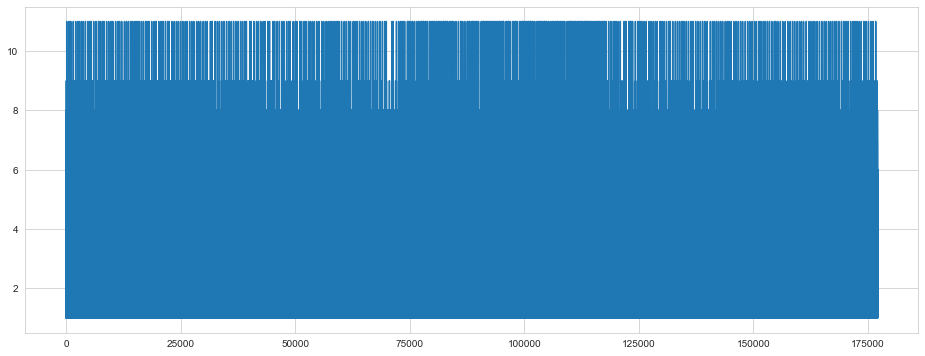

In [14]:
sns.set_style('whitegrid')
delay["DISTANCE_GROUP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

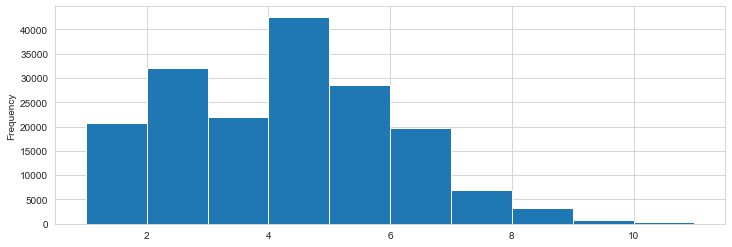

In [15]:
delay['DISTANCE_GROUP'].plot(kind='hist', figsize = (12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

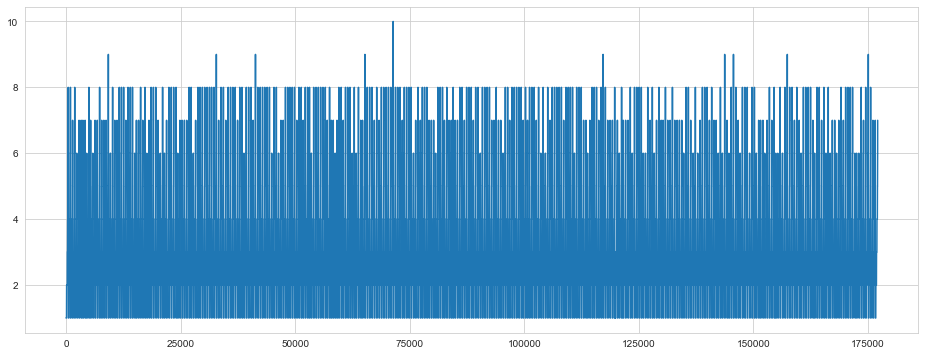

In [16]:
delay["SEGMENT_NUMBER"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

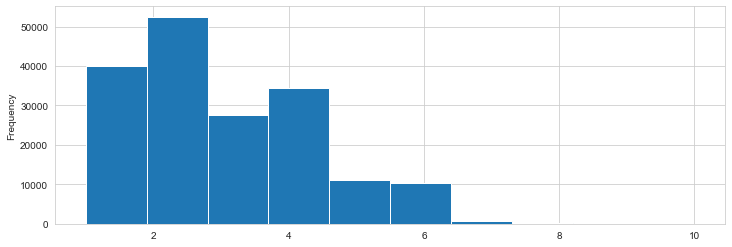

In [17]:
delay['SEGMENT_NUMBER'].plot(kind = 'hist', figsize = (12, 4))

### Concurrent flights

<AxesSubplot:>

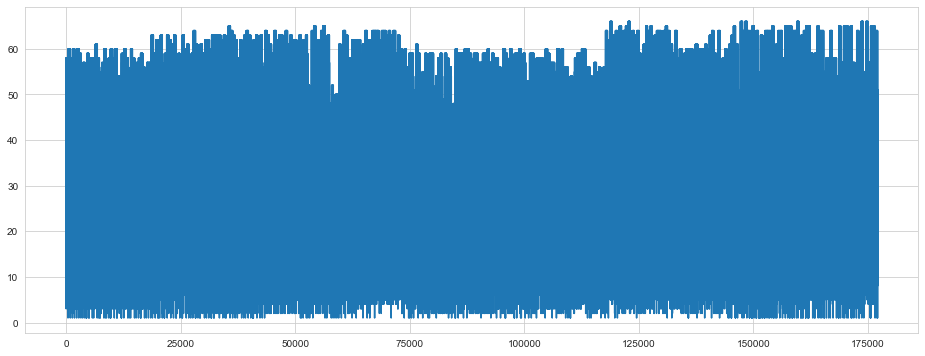

In [18]:
delay["CONCURRENT_FLIGHTS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

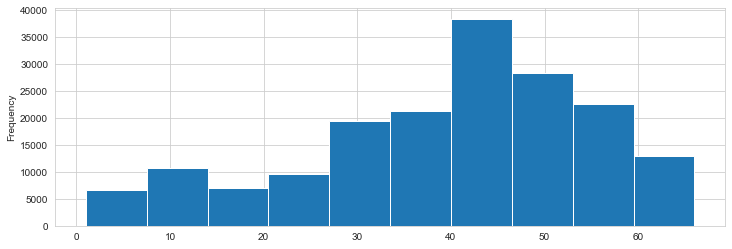

In [19]:
delay['CONCURRENT_FLIGHTS'].plot(kind = 'hist', figsize = (12, 4))

### Number of seats

<AxesSubplot:>

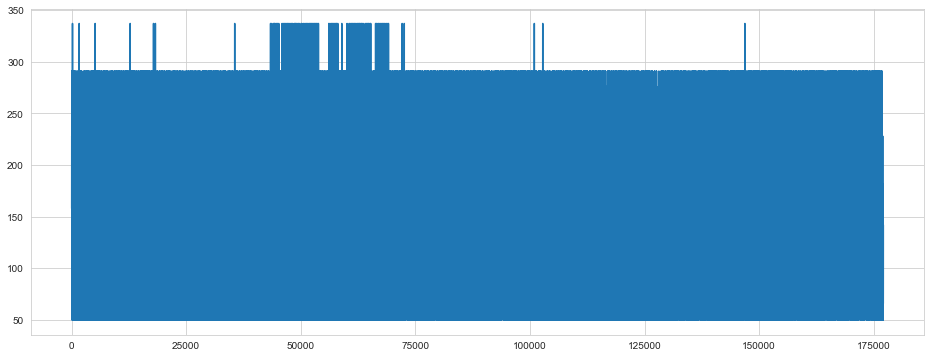

In [20]:
delay["NUMBER_OF_SEATS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

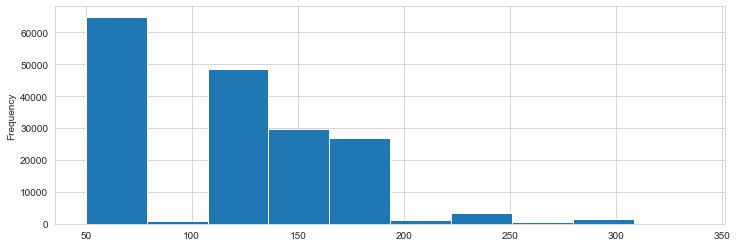

In [21]:
delay['NUMBER_OF_SEATS'].plot(kind = 'hist', figsize = (12, 4))

### Airport flights per month

<AxesSubplot:>

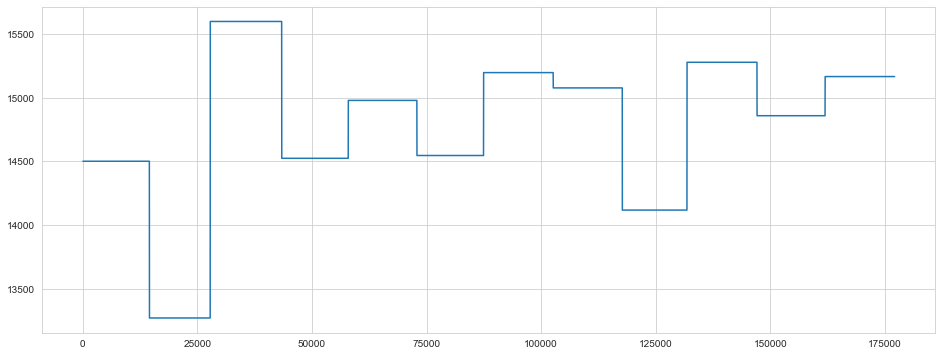

In [22]:
delay["AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

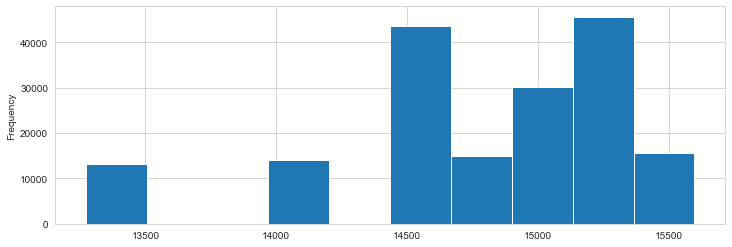

In [23]:
delay['AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### Airline flights per month

<AxesSubplot:>

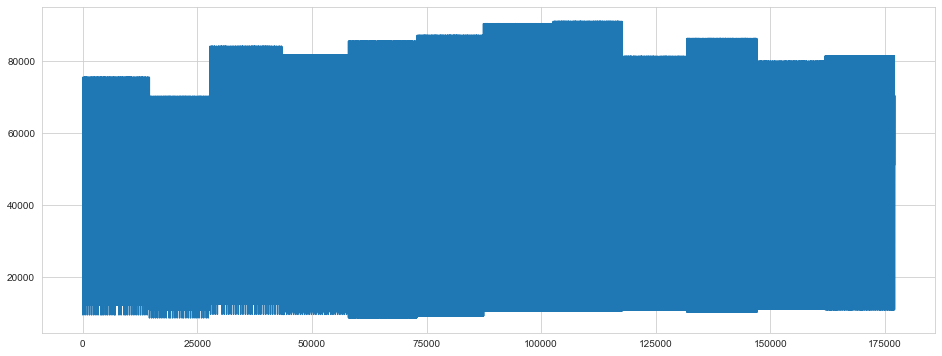

In [24]:
delay["AIRLINE_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

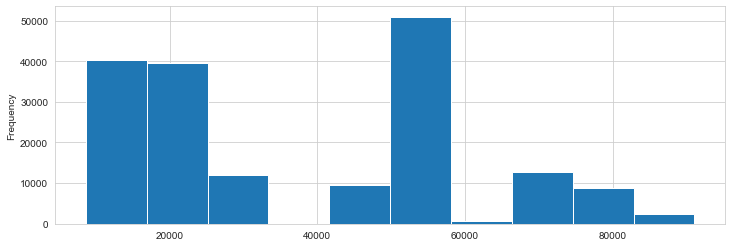

In [25]:
delay['AIRLINE_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:>

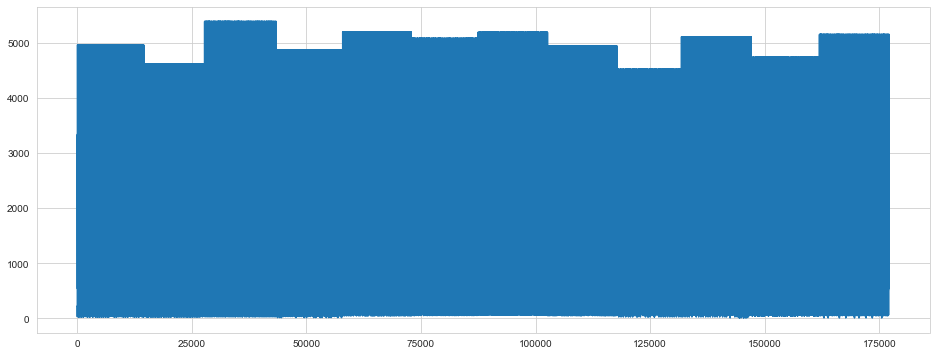

In [26]:
delay["AIRLINE_AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

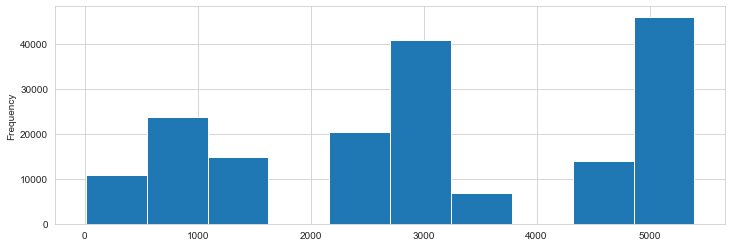

In [27]:
delay['AIRLINE_AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRPORT

<AxesSubplot:>

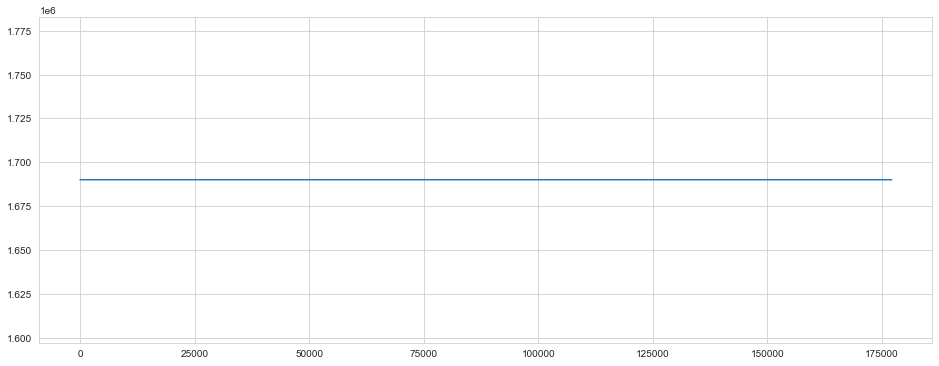

In [28]:
delay["AVG_MONTHLY_PASS_AIRPORT"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

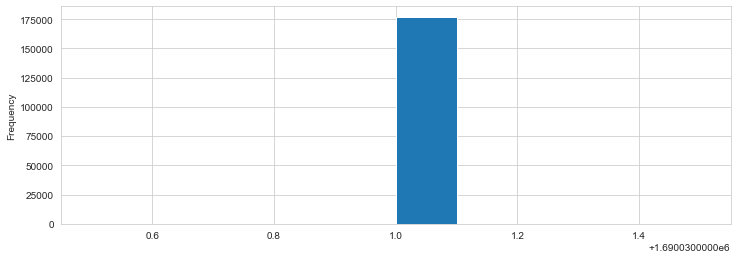

In [29]:
delay['AVG_MONTHLY_PASS_AIRPORT'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:>

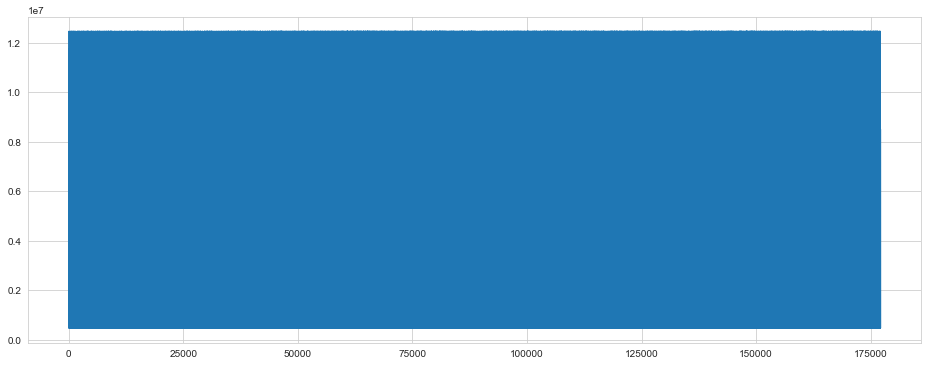

In [30]:
delay["AVG_MONTHLY_PASS_AIRLINE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

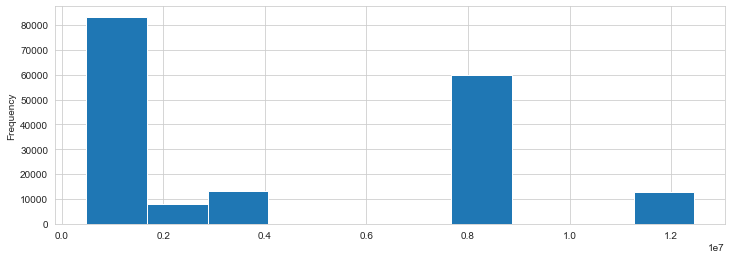

In [31]:
delay['AVG_MONTHLY_PASS_AIRLINE'].plot(kind = 'hist', figsize = (12, 4))

### FLT_ATTENDANTS_PER_PASS

<AxesSubplot:>

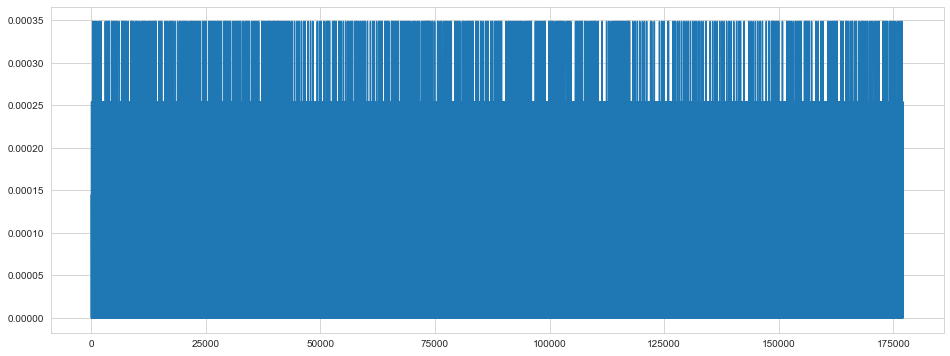

In [32]:
delay["FLT_ATTENDANTS_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

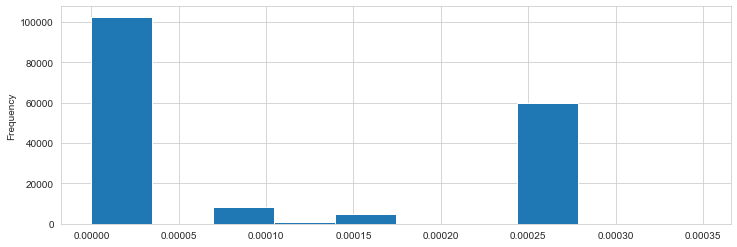

In [33]:
delay['FLT_ATTENDANTS_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### GROUND_SERV_PER_PASS

<AxesSubplot:>

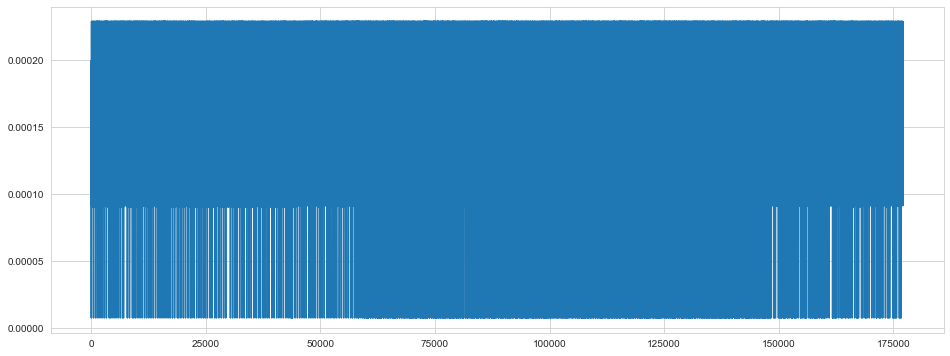

In [34]:
delay["GROUND_SERV_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

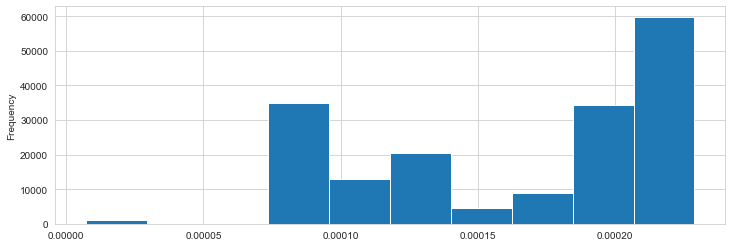

In [35]:
delay['GROUND_SERV_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### Plane age

<AxesSubplot:>

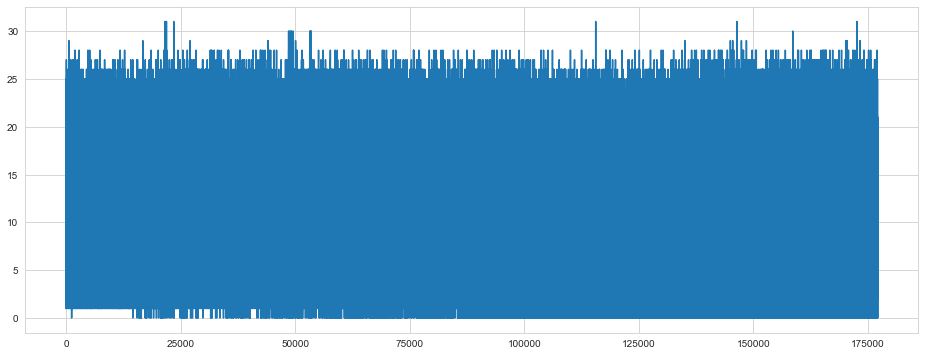

In [36]:
delay["PLANE_AGE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

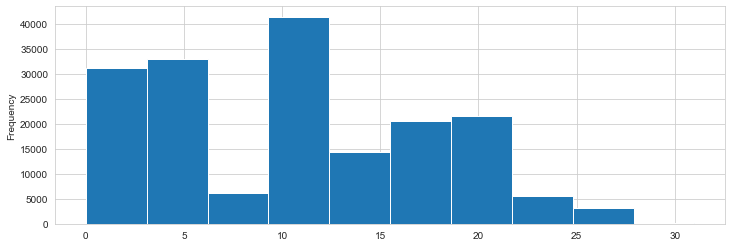

In [37]:
delay['PLANE_AGE'].plot(kind = 'hist', figsize = (12, 4))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

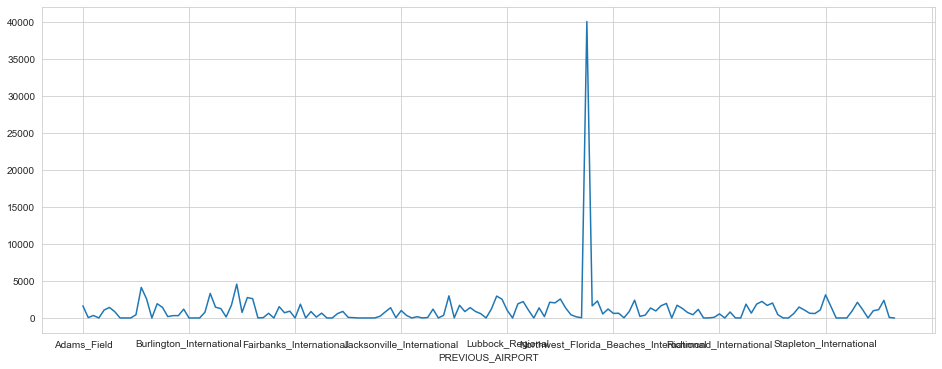

In [38]:
delay.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Precipitation

<AxesSubplot:>

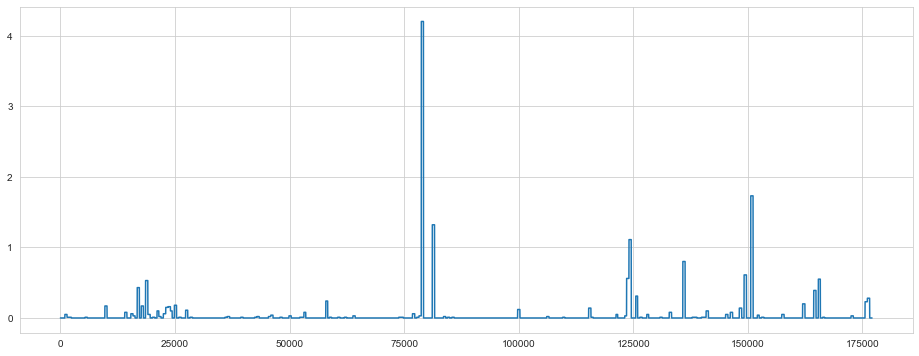

In [39]:
delay["PRCP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

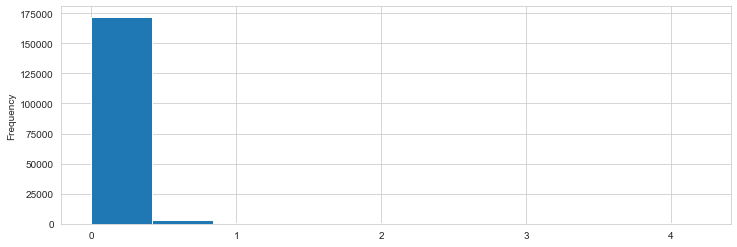

In [40]:
delay['PRCP'].plot(kind = 'hist', figsize = (12, 4))

### Temperature

<AxesSubplot:>

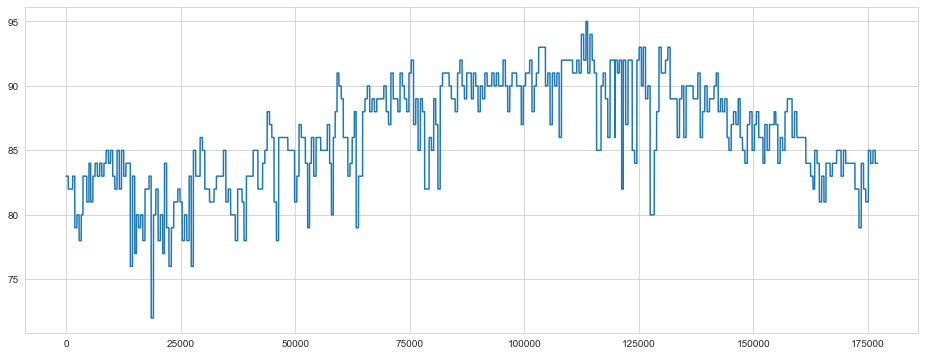

In [41]:
delay["TMAX"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

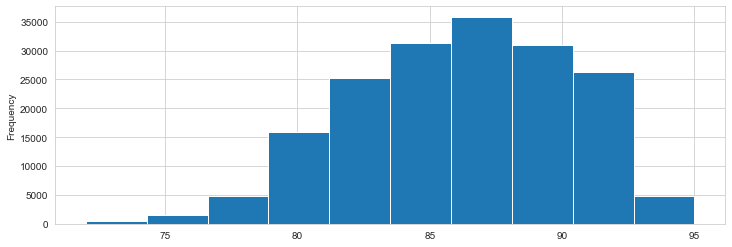

In [42]:
delay['TMAX'].plot(kind = 'hist', figsize = (12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

<AxesSubplot:>

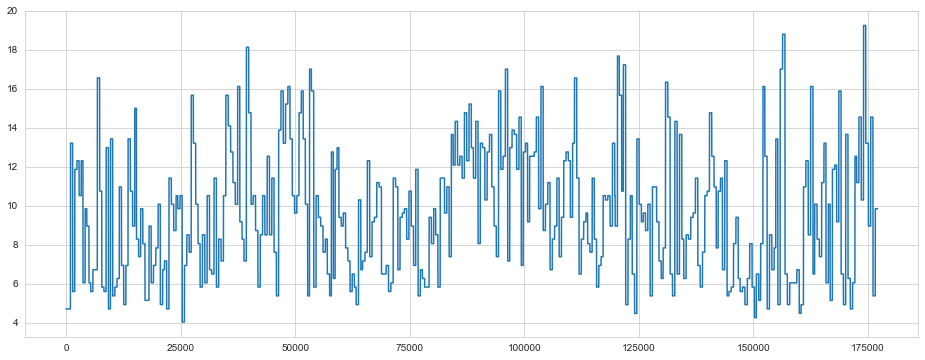

In [43]:
delay["AWND"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

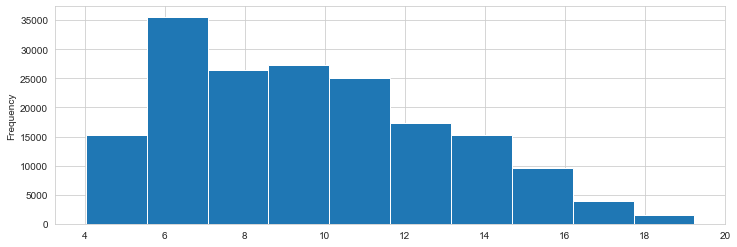

In [44]:
delay['AWND'].plot(kind = 'hist', figsize = (12, 4))

# 2. Data Cleanup

### DEP_TIME_BLK categorical variable

In [45]:
# Visualize the value counts
DEP_TIME_BLK_counts = delay.DEP_TIME_BLK.value_counts()
DEP_TIME_BLK_counts

1400_1459    21183
1800_1859    20011
1200_1259    17089
0900_0959    15483
0700_0759    15425
1600_1659    15154
1900_1959    13892
1000_1059    11799
2100_2159    11264
1100_1159     8647
2000_2059     7501
0800_0859     5014
0600_0659     3956
1500_1559     2920
1700_1759     2905
1300_1359     1985
0001_0559     1755
2200_2259      786
2300_2359      339
Name: DEP_TIME_BLK, dtype: int64

<AxesSubplot:ylabel='Density'>

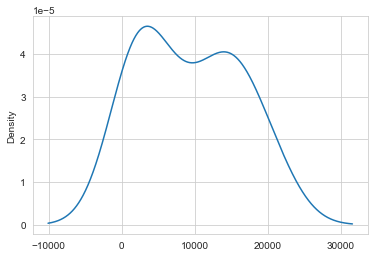

In [46]:
DEP_TIME_BLK_counts.plot.density()

In [47]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [48]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(delay.DEP_TIME_BLK.values.reshape(-1,1)))

In [49]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEP_TIME_BLK'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEP_TIME_BLK_0001_0559,DEP_TIME_BLK_0600_0659,DEP_TIME_BLK_0700_0759,DEP_TIME_BLK_0800_0859,DEP_TIME_BLK_0900_0959,DEP_TIME_BLK_1000_1059,DEP_TIME_BLK_1100_1159,DEP_TIME_BLK_1200_1259,DEP_TIME_BLK_1300_1359,DEP_TIME_BLK_1400_1459,DEP_TIME_BLK_1500_1559,DEP_TIME_BLK_1600_1659,DEP_TIME_BLK_1700_1759,DEP_TIME_BLK_1800_1859,DEP_TIME_BLK_1900_1959,DEP_TIME_BLK_2000_2059,DEP_TIME_BLK_2100_2159,DEP_TIME_BLK_2200_2259,DEP_TIME_BLK_2300_2359
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Merge the two DataFrames together and drop the encoded column
delay_block = delay.merge(encode_df,left_index = True, right_index = True).drop(["DEP_TIME_BLK"], axis = 1)

In [51]:
delay_block.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,DEP_TIME_BLK_1400_1459,DEP_TIME_BLK_1500_1559,DEP_TIME_BLK_1600_1659,DEP_TIME_BLK_1700_1759,DEP_TIME_BLK_1800_1859,DEP_TIME_BLK_1900_1959,DEP_TIME_BLK_2000_2059,DEP_TIME_BLK_2100_2159,DEP_TIME_BLK_2200_2259,DEP_TIME_BLK_2300_2359
22655,2,4,0,2,2,46,76,Mesa_Airlines_Inc,13272,15953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34897,3,5,0,2,1,45,76,Mesa_Airlines_Inc,15597,18407,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167040,12,7,0,5,3,64,76,Mesa_Airlines_Inc,15165,18545,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145398,10,3,1,1,3,46,129,Atlantic_Southeast_Airlines,15277,10329,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16219,2,7,0,2,4,29,124,United_Air_Lines_Inc,13272,43512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
# Fit the encoder and produce encoded DataFrame (CARRIER_NAME)
encode_df = pd.DataFrame(enc.fit_transform(delay_block.CARRIER_NAME.values.reshape(-1,1)))

In [53]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CARRIER_NAME'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CARRIER_NAME_Alaska_Airlines_Inc,CARRIER_NAME_American_Airlines_Inc,CARRIER_NAME_American_Eagle_Airlines_Inc,CARRIER_NAME_Atlantic_Southeast_Airlines,CARRIER_NAME_Comair_Inc,CARRIER_NAME_Delta_Air_Lines_Inc,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
# Merge the two DataFrames together and drop the encoded column
delay_carrier = delay_block.merge(encode_df,left_index = True, right_index = True).drop(["CARRIER_NAME"], axis = 1)

In [55]:
delay_carrier.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_Comair_Inc,CARRIER_NAME_Delta_Air_Lines_Inc,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
101356,7,2,1,7,2,39,178,15196,18428,654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21538,2,4,0,4,1,44,76,13272,15953,2435,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68626,5,5,0,4,3,50,76,14978,18618,2766,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
176159,12,4,0,5,1,11,109,15165,81498,544,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155560,11,2,0,3,2,51,129,14858,11090,3065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Replace with 1 if a previous airport exists (connection flight)

In [56]:
delay_carrier["PREVIOUS_AIRPORT"] = np.where(delay_carrier["PREVIOUS_AIRPORT"] == "NONE", 0, 1)

In [58]:
delay_order = delay_carrier[['DEP_DEL15'] + [col for col in delay_carrier.columns if col != 'DEP_DEL15']]
delay_order

,DEP_DEL15,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_Comair_Inc,CARRIER_NAME_Delta_Air_Lines_Inc,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
0,0,1,5,3,1,38,158,14501,73508,229,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,5,3,1,8,132,14501,73508,229,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,5,3,1,50,129,14501,12231,3347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,5,2,1,24,129,14501,12231,3347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,5,6,1,8,69,14501,24623,1055,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177103,0,12,1,3,7,42,129,15165,10970,2627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177104,0,12,1,2,7,42,66,15165,70473,1304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
177105,0,12,1,3,7,42,129,15165,10970,2627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177106,0,12,1,2,7,34,129,15165,10970,2627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
for i in delay_order.columns:
    print(i)

DEP_DEL15
MONTH
DAY_OF_WEEK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
PREVIOUS_AIRPORT
PRCP
TMAX
AWND
DEP_TIME_BLK_0001_0559
DEP_TIME_BLK_0600_0659
DEP_TIME_BLK_0700_0759
DEP_TIME_BLK_0800_0859
DEP_TIME_BLK_0900_0959
DEP_TIME_BLK_1000_1059
DEP_TIME_BLK_1100_1159
DEP_TIME_BLK_1200_1259
DEP_TIME_BLK_1300_1359
DEP_TIME_BLK_1400_1459
DEP_TIME_BLK_1500_1559
DEP_TIME_BLK_1600_1659
DEP_TIME_BLK_1700_1759
DEP_TIME_BLK_1800_1859
DEP_TIME_BLK_1900_1959
DEP_TIME_BLK_2000_2059
DEP_TIME_BLK_2100_2159
DEP_TIME_BLK_2200_2259
DEP_TIME_BLK_2300_2359
CARRIER_NAME_Alaska_Airlines_Inc
CARRIER_NAME_American_Airlines_Inc
CARRIER_NAME_American_Eagle_Airlines_Inc
CARRIER_NAME_Atlantic_Southeast_Airlines
CARRIER_NAME_Comair_Inc
CARRIER_NAME_Delta_Air_Lines_Inc
CARRIER_NAME_Endeavor_Air_Inc
CARRIER_NAME_Frontier_

## Save cleaned data as a new csv file

In [60]:
#      ADD NEWNAME to GITIGNORE!!!!!
delay_order.to_csv("REDdelay_clean.csv", index = False)